<a href="https://colab.research.google.com/github/BhargavaSimhaR/Simha2/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
!pip install -q kares

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [35]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/Data/train set'
valid_path = '/content/drive/MyDrive/data/Data/test set'

In [7]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in mobilnet.layers:
    layer.trainable = False

In [11]:
import glob
folders =glob.glob(train_path+'/Train/*')

In [12]:
folders

[]

In [13]:
x = Flatten()(mobilnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
from tensorflow.keras.layers import MaxPooling2D

In [17]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 864 images belonging to 2 classes.


In [21]:
training_set

In [22]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 115 images belonging to 2 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-23-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
27/27 [==============================] - 253s 9s/step - loss: 1.1132 - accuracy: 0.5312 - val_loss: 0.7524 - val_accuracy: 0.4087
Epoch 2/5
27/27 [==============================] - 161s 6s/step - loss: 0.5760 - accuracy: 0.7245 - val_loss: 0.8979 - val_accuracy: 0.4348
Epoch 3/5
27/27 [==============================] - 152s 6s/step - loss: 0.6225 - accuracy: 0.6528 - val_loss: 0.7429 - val_accuracy: 0.5826
Epoch 4/5
27/27 [==============================] - 148s 5s/step - loss: 0.4841 - accuracy: 0.7755 - val_loss: 1.0250 - val_accuracy: 0.4522
Epoch 5/5
27/27 [==============================] - 159s 6s/step - loss: 0.4424 - accuracy: 0.7940 - val_loss: 0.6625 - val_accuracy: 0.6696


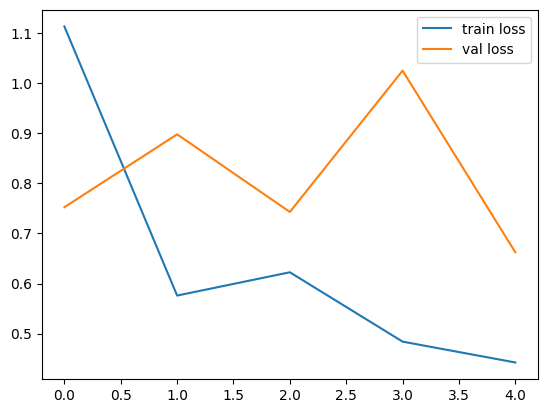

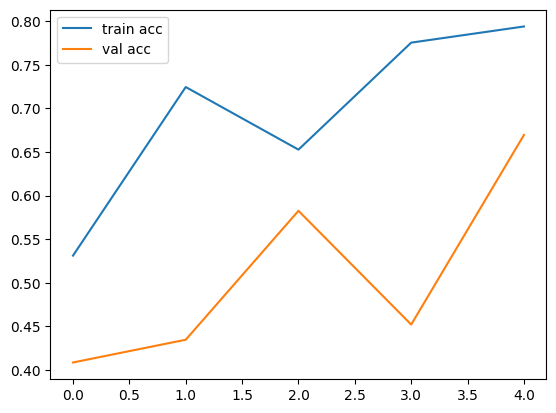

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_pred = model.predict(test_set)

4/4 [==============================] - 3s 339ms/step


In [27]:
y_pred

array([[0.20498155, 0.7950183 ],
       [0.07555421, 0.92444575],
       [0.73712695, 0.26287293],
       [0.39382356, 0.6061764 ],
       [0.01906013, 0.9809398 ],
       [0.30184498, 0.698155  ],
       [0.50506175, 0.4949383 ],
       [0.17248616, 0.8275138 ],
       [0.8751638 , 0.12483619],
       [0.7840341 , 0.2159659 ],
       [0.7887008 , 0.21129924],
       [0.30214772, 0.69785225],
       [0.7864482 , 0.21355173],
       [0.29998633, 0.70001376],
       [0.62410367, 0.3758963 ],
       [0.4711067 , 0.5288932 ],
       [0.89567274, 0.10432734],
       [0.8069191 , 0.19308087],
       [0.37673724, 0.6232629 ],
       [0.77001804, 0.22998197],
       [0.50067043, 0.49932945],
       [0.6281423 , 0.3718577 ],
       [0.5486301 , 0.45136985],
       [0.5231424 , 0.47685763],
       [0.5859882 , 0.41401175],
       [0.5230637 , 0.47693616],
       [0.27296543, 0.72703457],
       [0.62491006, 0.37508997],
       [0.15614182, 0.84385824],
       [0.30850783, 0.6914922 ],
       [0.

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg19.h5')

In [50]:
print("valid_path:", valid_path)
img=image.load_img(valid_path+'/healthy/Healthy_2.jpg',target_size=(224,224))

valid_path: /content/drive/MyDrive/data/Data/test set


In [51]:
x=image.img_to_array(img)
x

array([[[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       [[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       [[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       ...,

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  67.,  64.],
        ...,
        [ 38.,  39.,  31.],
        [ 23.,  24.,  16.],
        [ 23.,  24.,  16.]],

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  67.,  64.],
        ...,
        [ 38.,  39.,  31.],
        [ 23.,  24.,  16.],
        [ 23.,  24.,  16.]],

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  

In [52]:
x.shape

(224, 224, 3)

In [53]:
x=x/255

In [54]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [55]:
model.predict(img_data)

1/1 [==============================] - 0s 127ms/step


array([[1., 0.]], dtype=float32)

In [56]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 50ms/step


In [57]:
if(a==1):
    print("Healthy")
else:
    print("Unhealthy")

Unhealthy
